In [1]:
import tensorflow as tf

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

2024-06-26 13:30:34.145526: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 13:30:34.362534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 13:30:34.362573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 13:30:34.396264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 13:30:34.476708: I tensorflow/core/platform/cpu_feature_guar

--2024-06-26 13:30:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.5.27, 172.217.0.187, 142.250.191.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.5.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  43.3MB/s    in 2.4s    

2024-06-26 13:30:40 (43.3 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [2]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "pizza_steak".
There are 2 directories and 0 images in "pizza_steak/test".
There are 0 directories and 250 images in "pizza_steak/test/pizza".
There are 0 directories and 250 images in "pizza_steak/test/steak".
There are 2 directories and 0 images in "pizza_steak/train".
There are 0 directories and 750 images in "pizza_steak/train/pizza".
There are 0 directories and 750 images in "pizza_steak/train/steak".


In [66]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['pizza' 'steak']


In [87]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape: {img.shape}')

Image shape: (512, 384, 3)


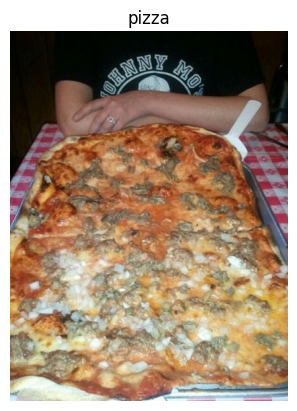

In [6]:
img = view_random_image('pizza_steak/train/', 'pizza')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


2024-06-26 13:30:53.884508: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-26 13:30:54.016805: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-26 13:30:54.016856: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-26 13:30:54.020300: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-26 13:30:54.020339: I external/local_xla/xla/stream_executor

Epoch 1/5


2024-06-26 13:30:55.417267: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-06-26 13:30:55.572137: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-06-26 13:30:55.572169: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-06-26 13:30:55.572213: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-06-26 13:30:56.005135: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-26 13:30:56.044155: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kerne

47/47 [==============================] - 9s 101ms/step - loss: 0.5946 - accuracy: 0.6833 - val_loss: 0.4155 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 3s 56ms/step - loss: 0.4303 - accuracy: 0.8013 - val_loss: 0.3263 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 3s 56ms/step - loss: 0.3761 - accuracy: 0.8367 - val_loss: 0.3230 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 3s 60ms/step - loss: 0.3361 - accuracy: 0.8600 - val_loss: 0.3158 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 3s 55ms/step - loss: 0.2632 - accuracy: 0.8960 - val_loss: 0.3195 - val_accuracy: 0.8720


In [8]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Epoch 1/5


2024-06-26 13:39:52.217966: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.


47/47 [==============================] - 4s 58ms/step - loss: 0.6304 - accuracy: 0.6680 - val_loss: 0.5841 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 3s 64ms/step - loss: 0.5766 - accuracy: 0.7547 - val_loss: 0.5571 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 3s 62ms/step - loss: 0.5650 - accuracy: 0.7567 - val_loss: 0.5533 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 3s 59ms/step - loss: 0.5532 - accuracy: 0.7673 - val_loss: 0.5758 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 3s 63ms/step - loss: 0.5364 - accuracy: 0.7640 - val_loss: 0.5457 - val_accuracy: 0.7400


In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3)

history_3 = model_3.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[callback])

Epoch 1/20
47/47 [==============================] - 3s 52ms/step - loss: 5.2604 - accuracy: 0.6567 - val_loss: 1.1364 - val_accuracy: 0.6960
Epoch 2/20
47/47 [==============================] - 2s 51ms/step - loss: 2.1757 - accuracy: 0.6787 - val_loss: 1.8412 - val_accuracy: 0.7100
Epoch 3/20
47/47 [==============================] - 2s 51ms/step - loss: 1.7130 - accuracy: 0.7107 - val_loss: 0.7774 - val_accuracy: 0.8000
Epoch 4/20
47/47 [==============================] - 2s 51ms/step - loss: 0.7407 - accuracy: 0.7813 - val_loss: 3.6855 - val_accuracy: 0.5660
Epoch 5/20
47/47 [==============================] - 2s 51ms/step - loss: 1.3650 - accuracy: 0.7220 - val_loss: 1.0463 - val_accuracy: 0.7520
Epoch 6/20
47/47 [==============================] - 2s 51ms/step - loss: 0.5036 - accuracy: 0.8093 - val_loss: 0.5766 - val_accuracy: 0.7900
Epoch 7/20
47/47 [==============================] - 2s 52ms/step - loss: 0.4403 - accuracy: 0.8333 - val_loss: 0.6124 - val_accuracy: 0.7920
Epoch 8/20
47

In [15]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_15 (Dense)            (None, 128)               19267712  
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19276033 (73.53 MB)
Trainable params: 19276033 (73.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Image shape: (512, 384, 3)
Image shape: (512, 512, 3)


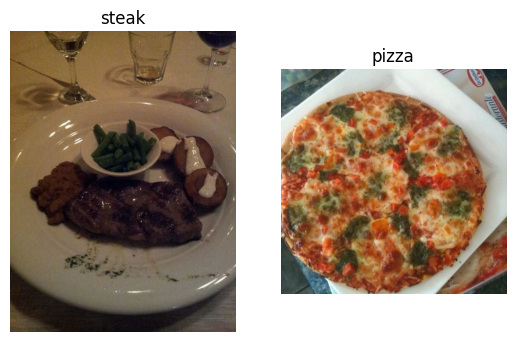

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
steak_img = view_random_image('pizza_steak/train/', 'pizza')

In [1]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

Create batches

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

2024-06-26 19:16:20.831157: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 19:16:21.393344: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 19:16:21.393505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 19:16:21.453308: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 19:16:21.625096: I tensorflow/core/platform/cpu_feature_guar

In [3]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [5]:
images[:2], images[0].shape

(array([[[[0.5764706 , 0.21960786, 0.00392157],
          [0.58431375, 0.22352943, 0.02352941],
          [0.6039216 , 0.23137257, 0.04313726],
          ...,
          [0.6509804 , 0.39607847, 0.16862746],
          [0.6313726 , 0.40000004, 0.18039216],
          [0.6313726 , 0.427451  , 0.19215688]],
 
         [[0.57254905, 0.23529413, 0.01176471],
          [0.5882353 , 0.23529413, 0.02745098],
          [0.58431375, 0.22352943, 0.03137255],
          ...,
          [0.6901961 , 0.4431373 , 0.13333334],
          [0.69803923, 0.46274513, 0.1764706 ],
          [0.64705884, 0.41960788, 0.16862746]],
 
         [[0.57254905, 0.2392157 , 0.01568628],
          [0.5568628 , 0.22352943, 0.00784314],
          [0.5568628 , 0.21176472, 0.01568628],
          ...,
          [0.69803923, 0.44705886, 0.10588236],
          [0.64705884, 0.40000004, 0.08627451],
          [0.67058825, 0.42352945, 0.16078432]],
 
         ...,
 
         [[0.6745098 , 0.4784314 , 0.12941177],
          [0.72941

In [6]:
labels

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [9]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [10]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [11]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2024-06-26 19:32:05.814317: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-06-26 19:32:06.104951: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-06-26 19:32:06.105002: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-06-26 19:32:06.105134: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-06-26 19:32:06.784952: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-26 19:32:06.861218: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kerne

47/47 [==============================] - 12s 135ms/step - loss: 0.5807 - accuracy: 0.7120 - val_loss: 0.3995 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 3s 60ms/step - loss: 0.3548 - accuracy: 0.8540 - val_loss: 0.3811 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 3s 60ms/step - loss: 0.2020 - accuracy: 0.9200 - val_loss: 0.4272 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 3s 58ms/step - loss: 0.0654 - accuracy: 0.9813 - val_loss: 0.5408 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 3s 59ms/step - loss: 0.0222 - accuracy: 0.9980 - val_loss: 0.5350 - val_accuracy: 0.8180


<Axes: >

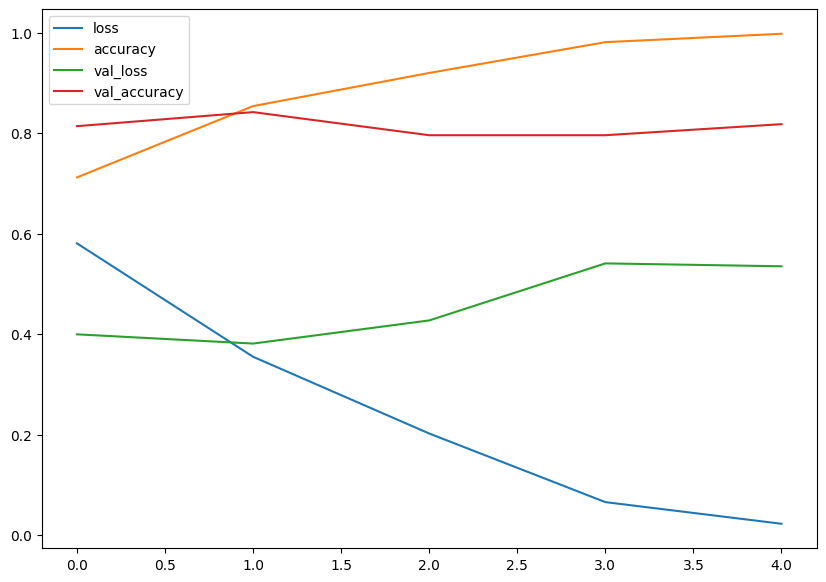

In [13]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [14]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [17]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 3s 60ms/step - loss: 0.4025 - accuracy: 0.8280 - val_loss: 0.3366 - val_accuracy: 0.8520
Epoch 2/10
47/47 [==============================] - 3s 56ms/step - loss: 0.3601 - accuracy: 0.8527 - val_loss: 0.3621 - val_accuracy: 0.8320
Epoch 3/10
47/47 [==============================] - 3s 56ms/step - loss: 0.3394 - accuracy: 0.8593 - val_loss: 0.3049 - val_accuracy: 0.8840
Epoch 4/10
47/47 [==============================] - 3s 57ms/step - loss: 0.3089 - accuracy: 0.8787 - val_loss: 0.3283 - val_accuracy: 0.8580
Epoch 5/10
47/47 [==============================] - 3s 58ms/step - loss: 0.2947 - accuracy: 0.8853 - val_loss: 0.2843 - val_accuracy: 0.8900
Epoch 6/10
47/47 [==============================] - 3s 59ms/step - loss: 0.2700 - accuracy: 0.8940 - val_loss: 0.3026 - val_accuracy: 0.8680
Epoch 7/10
47/47 [==============================] - 3s 58ms/step - loss: 0.2934 - accuracy: 0.8807 - val_loss: 0.3305 - val_accuracy: 0.8580
Epoch 8/10
47

<Axes: >

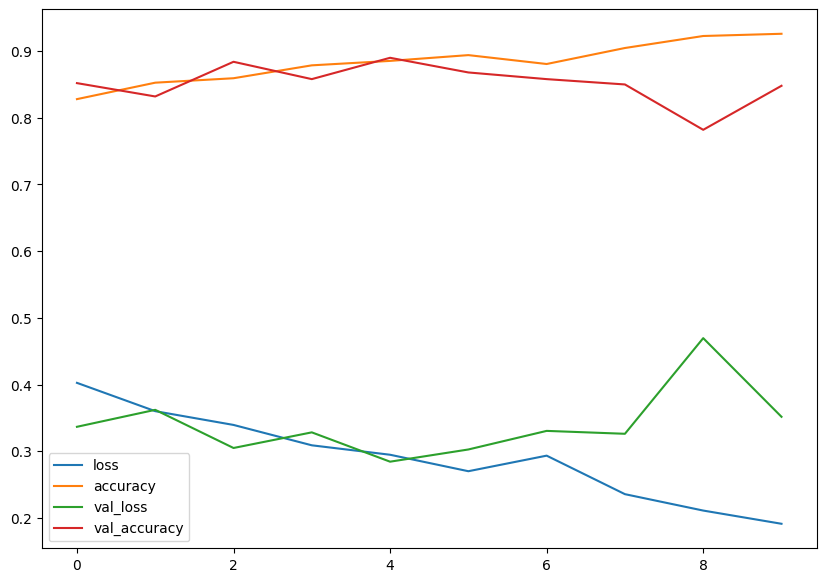

In [18]:
pd.DataFrame(history_5.history).plot(figsize=(10,7))

In [19]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [34]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary')

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
images, labels = train_data.next()
augmented_img, augmented_labels = train_data_augmented.next()

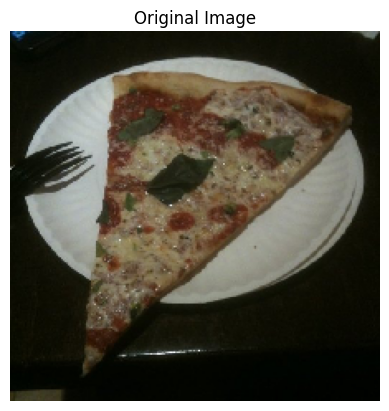

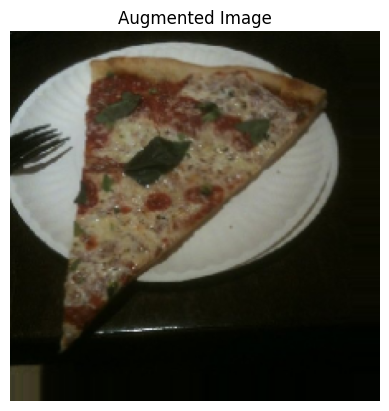

In [33]:
import random
import matplotlib.pyplot as plt
random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_img[random_number])
plt.title(f'Augmented Image')
plt.axis(False);

In [43]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6656 - accuracy: 0.5967 - val_loss: 0.5732 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.5808 - accuracy: 0.6900 - val_loss: 0.4145 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.5061 - accuracy: 0.7607 - val_loss: 0.3656 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4868 - accuracy: 0.7647 - val_loss: 0.3475 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4857 - accuracy: 0.7700 - val_loss: 0.3424 - val_accuracy: 0.8520


<Axes: >

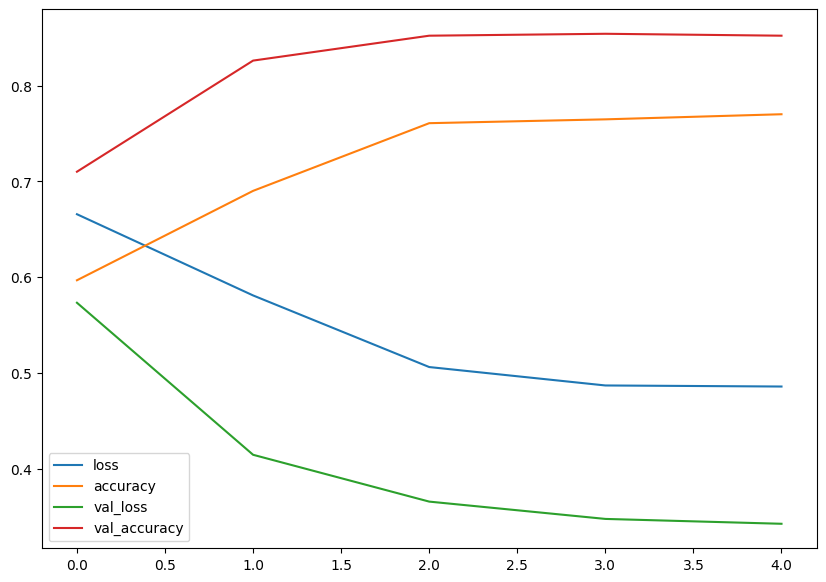

In [44]:
pd.DataFrame(history_6.history).plot(figsize=(10,7))

In [46]:
model_7 = Sequential([
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 240ms/step - loss: 0.6531 - accuracy: 0.6140 - val_loss: 0.5113 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.5594 - accuracy: 0.7260 - val_loss: 0.4702 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5136 - accuracy: 0.7567 - val_loss: 0.3684 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4987 - accuracy: 0.7627 - val_loss: 0.3517 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4723 - accuracy: 0.7827 - val_loss: 0.3592 - val_accuracy: 0.8540


<Axes: >

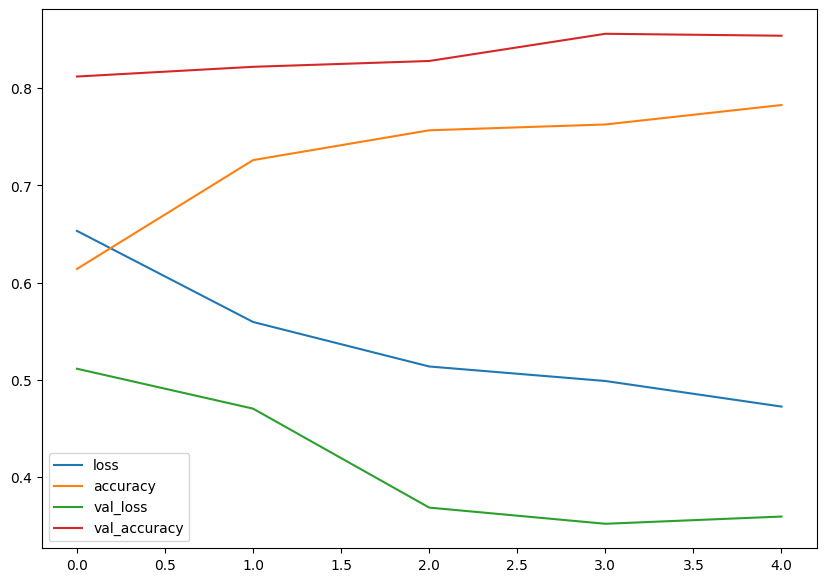

In [47]:
pd.DataFrame(history_7.history).plot(figsize=(10,7))

In [48]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2024-06-26 20:59:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2024-06-26 20:59:58 (27.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

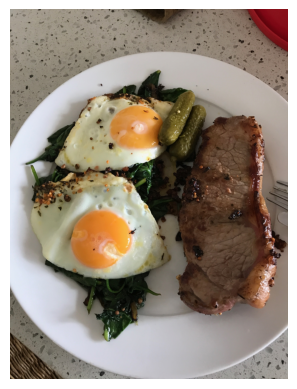

In [69]:
import matplotlib.image as mpimg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [55]:
import tensorflow as tf
expanded_steak = tf.expand_dims(steak, axis=0)

In [60]:
def load_and_prep_image(filename, img_shape=224, expand_dims=False):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.
    if expand_dims:
        img = tf.expand_dims(img, axis=0)
    return img

In [61]:
steak = load_and_prep_image('03-steak.jpeg', expand_dims=True)
steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [63]:
pred = model_7.predict(steak)

1/1 [==============================] - 0s 21ms/step


In [79]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename, expand_dims=True)
    pred = model.predict(img)
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img[0])
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 19ms/step


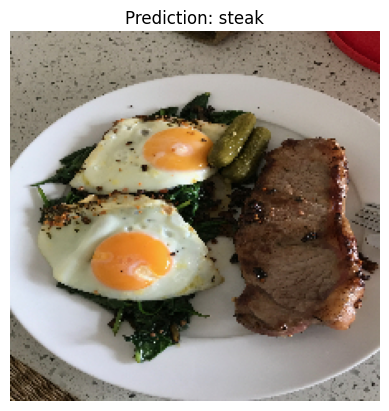

In [80]:
pred_and_plot(model_7, '03-steak.jpeg')

In [81]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2024-06-26 21:23:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.09s   

2024-06-26 21:23:26 (31.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 18ms/step


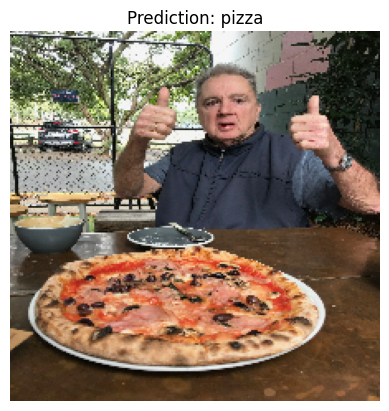

In [82]:
pred_and_plot(model_7, '03-pizza-dad.jpeg')

## Multiclass classification

In [83]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2024-06-26 21:30:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.115.207, 142.251.116.207, 142.250.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  60.9MB/s    in 8.8s    

2024-06-26 21:30:27 (56.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [84]:
import os
import pathlib
import numpy as np

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

data_dir = pathlib.Path('10_food_classes_all_data/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

There are 2 directories and 0 images in "10_food_classes_all_data".
There are 10 directories and 0 images in "10_food_classes_all_data/test".
There are 0 directories and 250 images in "10_food_classes_all_data/test/grilled_salmon".
There are 0 directories and 250 images in "10_food_classes_all_data/test/chicken_curry".
There are 0 directories and 250 images in "10_food_classes_all_data/test/hamburger".
There are 0 directories and 250 images in "10_food_classes_all_data/test/ice_cream".
There are 0 directories and 250 images in "10_food_classes_all_data/test/ramen".
There are 0 directories and 250 images in "10_food_classes_all_data/test/sushi".
There are 0 directories and 250 images in "10_food_classes_all_data/test/chicken_wings".
There are 0 directories and 250 images in "10_food_classes_all_data/test/pizza".
There are 0 directories and 250 images in "10_food_classes_all_data/test/steak".
There are 0 directories and 250 images in "10_food_classes_all_data/test/fried_rice".
There are 

In [85]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

Image shape: (512, 512, 3)


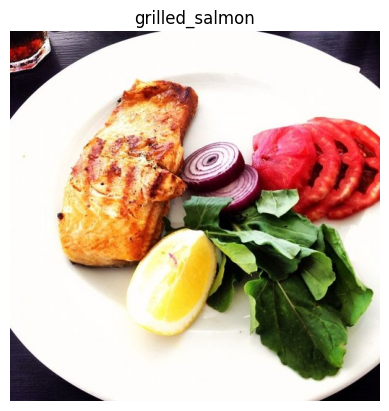

In [104]:
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [105]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [106]:
model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 189ms/step - loss: 2.2361 - accuracy: 0.1644 - val_loss: 2.1015 - val_accuracy: 0.2312
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 2.1166 - accuracy: 0.2328 - val_loss: 1.9611 - val_accuracy: 0.3144
Epoch 3/5
235/235 [==============================] - 42s 178ms/step - loss: 2.0523 - accuracy: 0.2681 - val_loss: 1.9340 - val_accuracy: 0.3176
Epoch 4/5
235/235 [==============================] - 42s 178ms/step - loss: 2.0136 - accuracy: 0.2903 - val_loss: 1.8532 - val_accuracy: 0.3552
Epoch 5/5
235/235 [==============================] - 42s 180ms/step - loss: 1.9797 - accuracy: 0.3048 - val_loss: 1.8404 - val_accuracy: 0.3772


In [108]:
model_1.evaluate(test_data)

79/79 [==============================] - 3s 41ms/step - loss: 1.8404 - accuracy: 0.3772


[1.8404361009597778, 0.37720000743865967]

<Axes: >

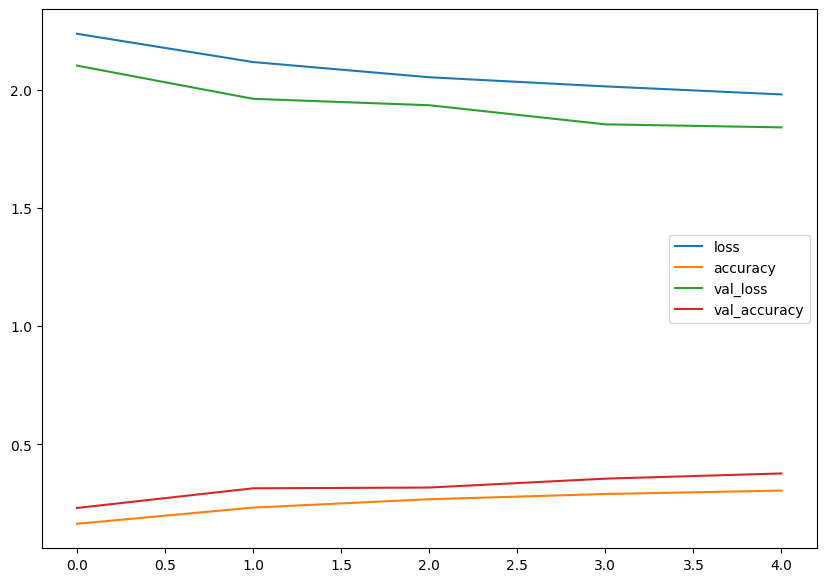

In [107]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [109]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3)
model_2 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[callback])

Epoch 1/20
235/235 [==============================] - 42s 174ms/step - loss: 2.1912 - accuracy: 0.1991 - val_loss: 1.9788 - val_accuracy: 0.2996
Epoch 2/20
235/235 [==============================] - 41s 174ms/step - loss: 2.0705 - accuracy: 0.2629 - val_loss: 1.9605 - val_accuracy: 0.3168
Epoch 3/20
235/235 [==============================] - 42s 179ms/step - loss: 2.0439 - accuracy: 0.2725 - val_loss: 1.8777 - val_accuracy: 0.3520
Epoch 4/20
235/235 [==============================] - 42s 177ms/step - loss: 1.9970 - accuracy: 0.2992 - val_loss: 1.9375 - val_accuracy: 0.3312
Epoch 5/20
235/235 [==============================] - 41s 176ms/step - loss: 1.9621 - accuracy: 0.3147 - val_loss: 1.8377 - val_accuracy: 0.3564
Epoch 6/20
235/235 [==============================] - 42s 176ms/step - loss: 1.9199 - accuracy: 0.3367 - val_loss: 1.8032 - val_accuracy: 0.3704
Epoch 7/20
235/235 [==============================] - 42s 177ms/step - loss: 1.8997 - accuracy: 0.3404 - val_loss: 1.7888 - val_ac

<Axes: >

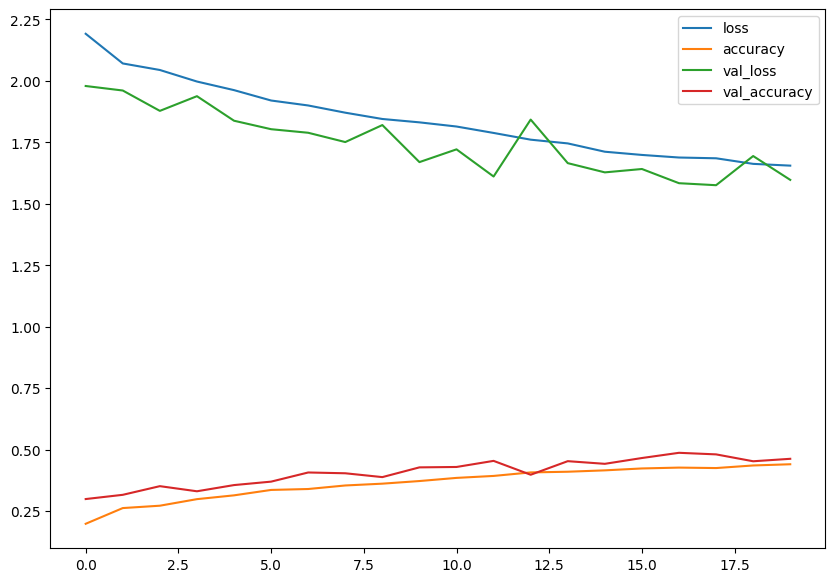

In [110]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [112]:
model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 208ms/step - loss: 2.1828 - accuracy: 0.2133 - val_loss: 1.9878 - val_accuracy: 0.2864
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 2.0335 - accuracy: 0.2875 - val_loss: 1.8789 - val_accuracy: 0.3524
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 1.9802 - accuracy: 0.3105 - val_loss: 1.8677 - val_accuracy: 0.3612
Epoch 4/5
235/235 [==============================] - 44s 189ms/step - loss: 1.9586 - accuracy: 0.3267 - val_loss: 1.7958 - val_accuracy: 0.3724
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 1.9365 - accuracy: 0.3279 - val_loss: 1.7988 - val_accuracy: 0.3764


<Axes: >

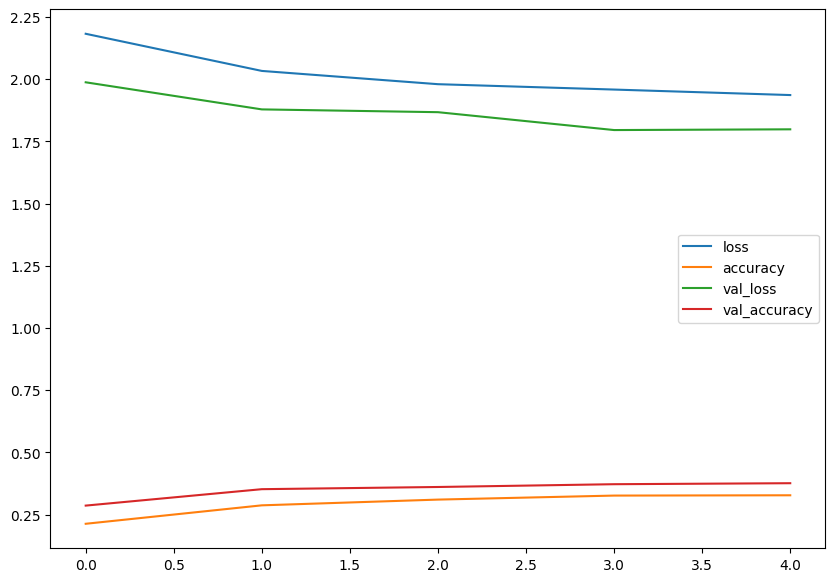

In [113]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [114]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2024-06-26 23:55:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2024-06-26 23:55:15 (33.0 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2024-06-26 23:55:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awai

In [125]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename, expand_dims=True)
    pred = model.predict(img)
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
    plt.imshow(img[0])
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 40ms/step


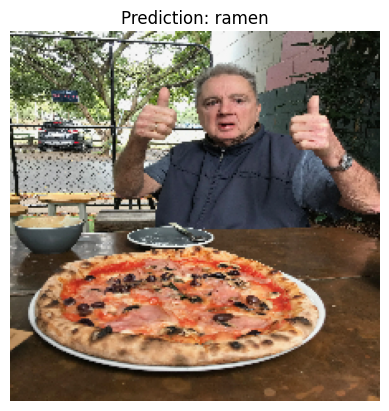

In [126]:
pred_and_plot(model=model_2,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 35ms/step


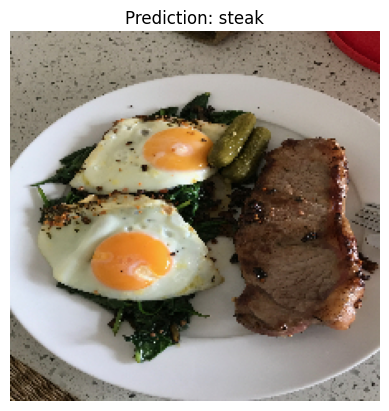

In [127]:
pred_and_plot(model=model_2,
              filename='03-steak.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 13ms/step


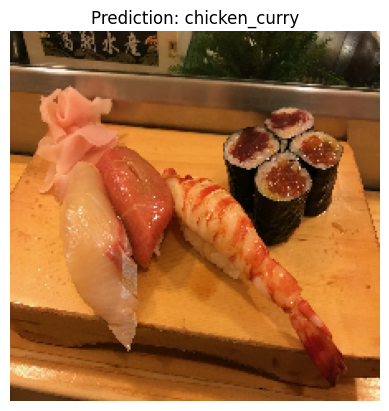

In [128]:
pred_and_plot(model=model_2,
              filename='03-sushi.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 16ms/step


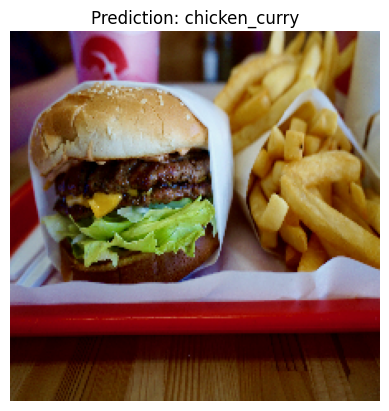

In [129]:
pred_and_plot(model=model_2,
              filename='03-hamburger.jpeg',
              class_names=class_names)

In [130]:
model_2.save('saved_multiclassification_model')

INFO:tensorflow:Assets written to: saved_multiclassification_model/assets


INFO:tensorflow:Assets written to: saved_multiclassification_model/assets


In [131]:
loaded_model = tf.keras.models.load_model('saved_multiclassification_model')
loaded_model.evaluate(test_data)

79/79 [==============================] - 4s 49ms/step - loss: 1.5972 - accuracy: 0.4632


[1.5972108840942383, 0.46320000290870667]